In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load dataset from Kaggle
df = pd.read_csv("Admission_Predict1.csv")


In [4]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:

# Rename columns for easier access
df.rename(columns={'Chance of Admit ': 'Admitted'}, inplace=True)
df['Admitted'] = df['Admitted'].apply(lambda x: 1 if x >= 0.5 else 0)



In [6]:
# Summary statistics
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research    Admitted  
count  500.00000  500.000000  500.000000  500.000000  
mean     3.48400    8.576440    0.560000    0.926000  
std      0.92545    0.604813    0.496884    0.262033  
min      1.00000    6.800000    0.000000    0.000000  
25%      3.0

In [7]:
# Checking correlation between features
print("\nFeature Correlation:\n", df.corr())


Feature Correlation:
                    Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Admitted             0.094566   0.360530     0.359774           0.255606   

                        SOP      LOR       CGPA  Research  Admitted  
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332  0.094566  
GRE Score          0.613498  0.524679  0.825878  0.563398  0.360530  
TOEFL 

In [8]:
# Rename columns for easier access
df.rename(columns={'Chance of Admit ': 'Admitted'}, inplace=True)
df['Admitted'] = df['Admitted'].apply(lambda x: 1 if x >= 0.5 else 0)

In [9]:
# Selecting only GRE and GPA as features based on given problem statement
X = df[['GRE Score', 'CGPA']]
y = df['Admitted']


In [10]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Applying Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [13]:
# Making predictions
y_pred = clf.predict(X_test)

In [14]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 92.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.95      0.97      0.96        91

    accuracy                           0.92       100
   macro avg       0.76      0.71      0.73       100
weighted avg       0.91      0.92      0.92       100

Confusion Matrix:
 [[ 4  5]
 [ 3 88]]


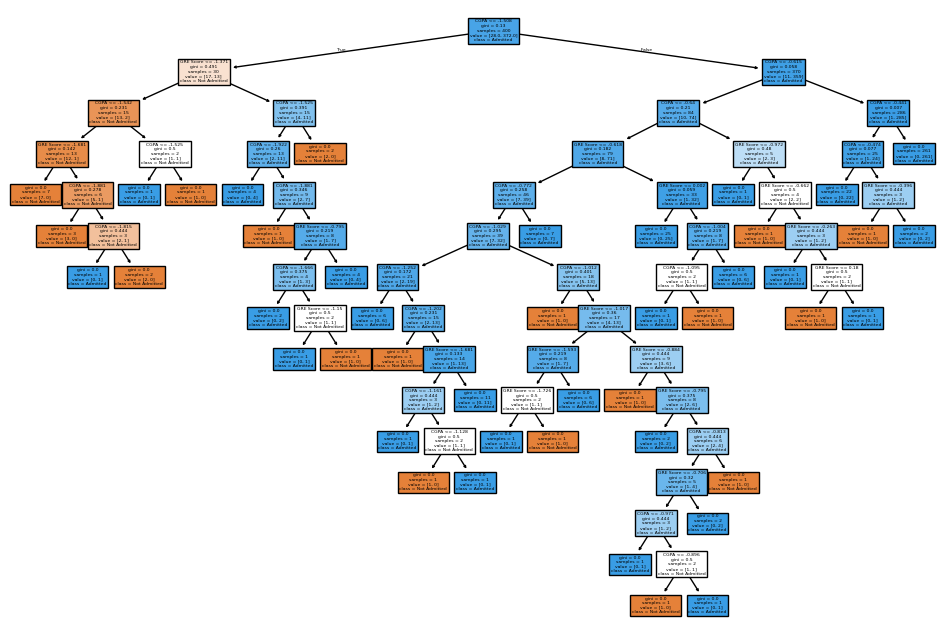

In [15]:
# Visualizing the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['GRE Score', 'CGPA'], class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()